In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


***1. Load the dataset in Python environment  ***

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train_loan.csv to train_loan.csv


In [3]:
data = pd.read_csv('/content/train_loan.csv')

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**2.Perform different preprocessing steps**

**a.Missing value handling**

In [15]:
# For numerical columns
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

# For categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

data.isna().sum()



,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Description: Numerical columns are filled with the median, while categorical columns are filled with the mode. This handles missing data in a way that maintains the distribution of each feature.


**b.Outlier Detection**

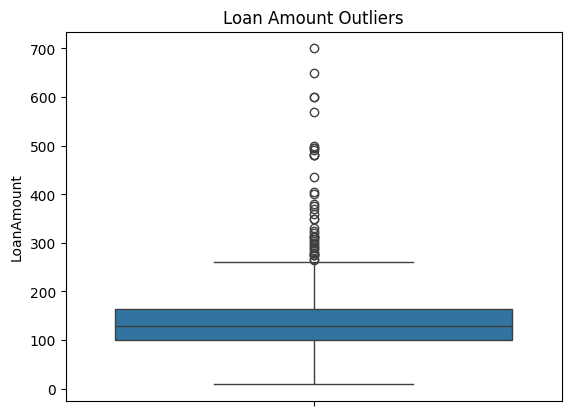

In [16]:
#Detect Outliers with Box Plot:

sns.boxplot(data['LoanAmount'])
plt.title('Loan Amount Outliers')
plt.show()



**Description**: A box plot for LoanAmount shows any extreme values (outliers) that might need to be capped or removed.

c.**ENCODING**

In [17]:
#One-Hot Encoding:
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
data.head()



,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,128.0,360.0,1.0,Y,True,False,False,False,False,True
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,True,True,False,False,False,False
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,True,True,False,True,False,True
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,True,True,True,False,False,True
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,True,False,False,False,False,True


**Description**: One-hot encoding is applied to convert categorical variables into numerical columns. The drop_first=True parameter reduces the risk of multicollinearity.

**d.Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,-0.554487,-0.211241
1,-0.134412,-0.038732,-0.211241
2,-0.393747,-0.554487,-0.948996
3,-0.462062,0.251980,-0.306435
4,0.097728,-0.554487,-0.056551


**Description**: Standard scaling is applied to numerical columns, transforming them to have a mean of 0 and a standard deviation of 1.